In [1]:
cd ..

/wk2/boyochen/tcsa-cnn


In [2]:
%env CUDA_VISIBLE_DEVICES = "-1"

env: CUDA_VISIBLE_DEVICES="-1"


In [3]:
import matplotlib.pyplot as plt
from modules.feature_generator import load_dataset
import numpy as np
import pandas as pd

In [8]:
data_folder = 'TCSA_data/'
cart_data = load_dataset(data_folder, 'train', good_VIS_only=True, positive_R35_only=False, coordinate='cart')
polar_data = load_dataset(data_folder, 'train', good_VIS_only=True, positive_R35_only=False, coordinate='polar')

pickle TCSA_data/TCSA.train.cart.pickle not found! try to extract it from raw data!


/wk2/boyochen/tcsa-cnn/modules/feature_generator.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['minutes_to_noon'] = label_df['local_time'].apply(get_minutes_to_noon)
/wk2/boyochen/tcsa-cnn/modules/feature_generator.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['is_good_quality_VIS'] = mark_good_quality_VIS(label_df, images)


saving train data pickle!
saving valid data pickle!
saving test data pickle!


In [6]:
def sample_4_channel(phase_data, fig_high, target_index=0):
    fig = plt.figure(figsize=(12, fig_high))
    target_image = phase_data['image'][target_index]
    ID = phase_data['label']['ID'][target_index]
    local_time = phase_data['label']['local_time'][target_index]
    formated_time = local_time.strftime("%m/%d %H:%M")
    fig.suptitle('ID: %s, local time: %s'%(ID, formated_time), fontsize=20)
    for i, channel_name in enumerate(['IR1', 'WV', 'VIS', 'PMW']):
        plt.subplot(1, 4, i+1)
        plt.imshow(target_image[:, :, i], cmap='gray')
        plt.title('(%s) %s' % (chr(97+i), channel_name))

    plt.show()

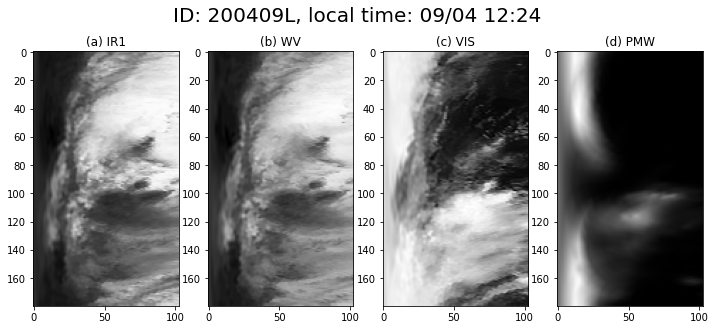

NameError: name 'cart_data' is not defined

In [7]:
sample_index = 180
sample_4_channel(polar_data, fig_high=5, target_index=sample_index)
sample_4_channel(cart_data, fig_high=3.5, target_index=sample_index)
sample_image = polar_data['image'][sample_index]

In [26]:
from modules.image_processor import cart2polar, polar2cart
from modules.image_processor import shift_polar_images, random_rotate, evenly_rotate

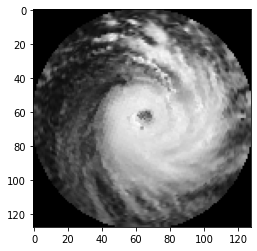

In [33]:
cart_image = polar2cart(sample_image)

plt.figure()
plt.imshow(cart_image[:, :, 2], cmap='gray')

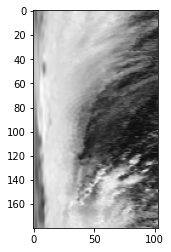

In [34]:
polar_image = cart2polar(cart_image)

plt.figure()
plt.imshow(polar_image[:, :, 2], cmap='gray')

In [35]:
polar_images = polar_data['image'][:200]

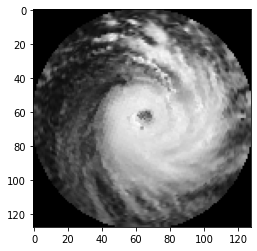

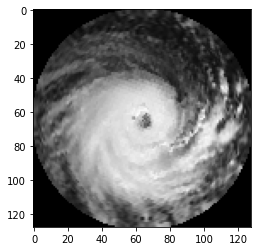

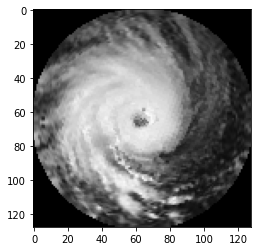

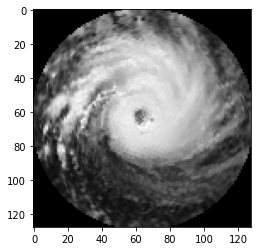

In [36]:
for sample_index in [180]:
    for shift in [0, 45, 90, 135]:
        rotated_images = shift_polar_images(images, shift)
        sample_image = rotated_images[sample_index]
        cart_image = polar2cart(sample_image)

        plt.figure()
        plt.imshow(cart_image[:, :, 2], cmap='gray')

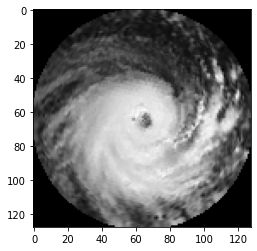

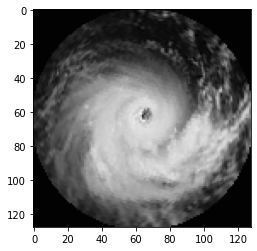

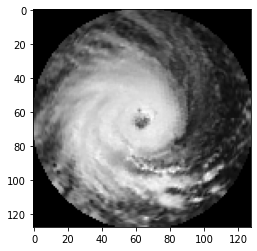

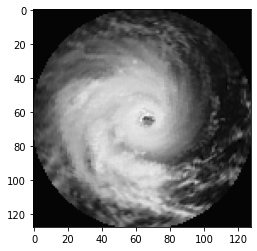

In [37]:
for shift in [0, 1]:
    rotated_images = random_rotate(images)
    for sample_index in [180, 181]:
        sample_image = rotated_images[sample_index]
        cart_image = polar2cart(sample_image)

        plt.figure()
        plt.imshow(cart_image[:, :, 2], cmap='gray')

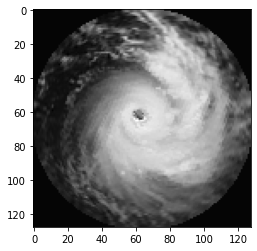

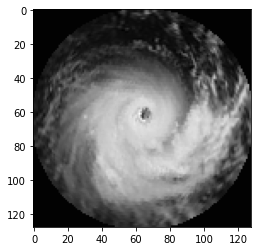

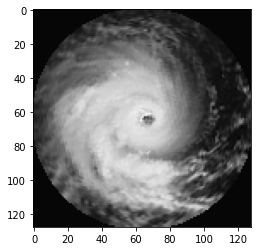

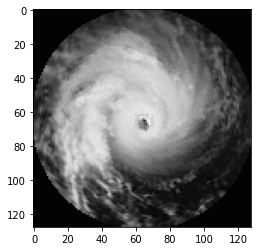

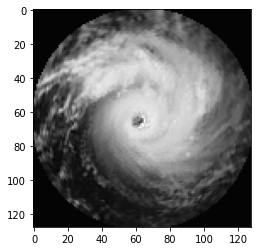

In [38]:
evenly_rotated_images = evenly_rotate(images, 5)

for IMs in evenly_rotated_images:
    sample_image = IMs[sample_index]
    cart_image = polar2cart(sample_image)

    plt.figure()
    plt.imshow(cart_image[:, :, 2], cmap='gray')